In [1]:
import pandas as pd
import ClassificatorUtils as cls
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.metrics import recall_score
import matplotlib.patches as mpatches




/home/jgorospe/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

csv_path = '../data/ACC.csv'
df_acc = pd.read_csv(csv_path)
df_acc = df_acc.drop([ 'ID', 'scenario', 'seed', 'Controller', 'numHumanCars', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'PacketSize', 'waitTime', 'DENMInterval'], axis=1)
df_acc = df_acc.dropna()
df_acc = df_acc.drop_duplicates()

csv_path = '../data/CACC_truncated.xlsx'
df_cacc = pd.read_excel(csv_path)
df_cacc = df_cacc.drop([ 'ID', 'scenario', 'seed', 'Controller'], axis=1)
df_cacc = df_cacc.dropna()
df_cacc = df_cacc.drop_duplicates()

csv_path = '../data/PLOEG_truncated.xlsx'
df_ploeg = pd.read_excel(csv_path)
df_ploeg = df_ploeg.drop([ 'ID', 'scenario', 'seed', 'Controller'], axis=1)
df_ploeg = df_ploeg.dropna()
df_ploeg = df_ploeg.drop_duplicates()

f_names_acc = ['numPlatCars', 'spdLeader', 'DecelerationRate', 'Ctr_Param(Ploegh||Spacing)']
f_names_acc_plot = ['Platoon vehicles', 'Leader speed', 'Deceleration rate', 'ACC CTG']
X_acc = df_acc[f_names_acc]
y_acc = df_acc['Collision']

f_names = ['numPlatCars', 'numHumanCars', 'spdLeader', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'DENMInterval', 'DecelerationRate', 'PacketSize', 'Ctr_Param(Ploegh||Spacing)', 'waitTime']
f_names_plot = ['Platoon vehicles', 'Neighbouring vehicles', 'Leader speed', 'Beacon interval (platoon)', 'Beacon interval (neighbours)', 'DENM Interval', 'Deceleration rate', 'Packet size', 'PATH CACC CDG', 'Waiting time']
X_cacc = df_cacc[f_names]
y_cacc = df_cacc['Collision']

X_ploeg = df_ploeg[f_names]
y_ploeg = df_ploeg['Collision']


In [3]:
def test_dec_tree_ploeg(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 2
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = RandomForestClassifier(class_weight="balanced").fit(X_train, y_train)
    print(cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'RandomForest', True, column_names, [leafs]))
    return dt

def test_dec_tree_cacc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 8#5
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = RandomForestClassifier(class_weight="balanced").fit(X_train, y_train)
    print(cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'RandomForest', True, column_names, [leafs]))
    return dt

def test_dec_tree_acc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 45
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train_std, y_train)
    print(cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'DecisionTree', True, column_names, [leafs]))
    return dt

# CART Classification Feature Importance (DT)

      Algorithm  Standarised  AccTrain       Acc      Prec    Recall    TN  \
0  DecisionTree         True  0.974965  0.966639  0.785714  0.993056  1016   

   FP  FN   TP   TimeMed   TimeMax   TimeMin  max_leaf_node  
0  39   1  143  0.000084  0.001116  0.000048             45  

Feature: numPlatCars, Score: 0.06927
Feature: spdLeader, Score: 0.07528
Feature: DecelerationRate, Score: 0.51494
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.34051


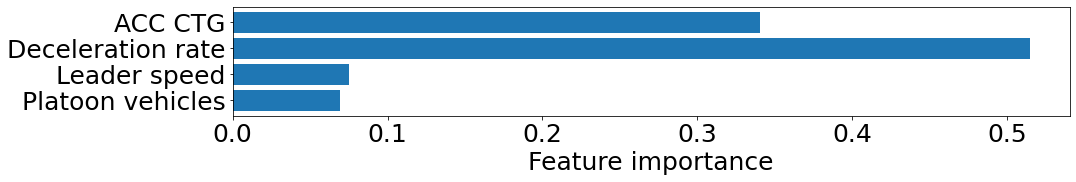

In [4]:
dt = cls.test_algorithms(X_acc, y_acc, test_dec_tree_acc)
print()
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names_acc[i],v))
# plot feature importance
plt.figure(figsize=(15,2))
plt.rcParams['font.size'] = '25'
plt.barh(f_names_acc_plot, importance)
plt.xlabel("Feature importance", fontsize=25)
plt.show()


ACC plot
Spacing x 3 (DecRate + spdLeader + numPlatCars)
1 row of three plots

      Algorithm  Standarised  AccTrain       Acc      Prec    Recall   TN  FP  \
0  RandomForest         True       1.0  0.974684  0.953488  0.911111  190   2   

   FN  TP   TimeMed   TimeMax   TimeMin  max_leaf_node  
0   4  41  0.008351  0.043493  0.006433              8  
Feature: numPlatCars, Score: 0.13337
Feature: numHumanCars, Score: 0.18081
Feature: spdLeader, Score: 0.09502
Feature: BeaconIntervalPlat, Score: 0.05619
Feature: BeaconIntervalHuman, Score: 0.07214
Feature: DENMInterval, Score: 0.04270
Feature: DecelerationRate, Score: 0.01821
Feature: PacketSize, Score: 0.04711
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.19268
Feature: waitTime, Score: 0.16176


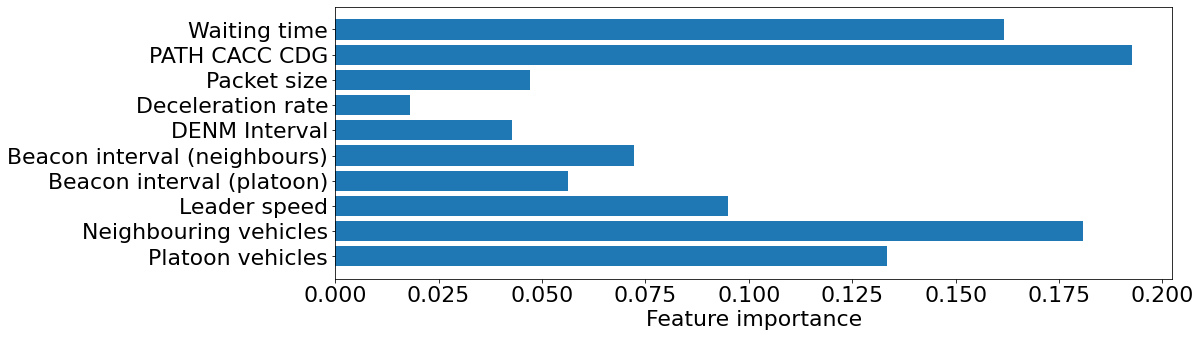

In [5]:
dt = cls.test_algorithms(X_cacc, y_cacc, test_dec_tree_cacc)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names[i],v))
# plot feature importance
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = '22'
plt.barh(f_names_plot, importance)
plt.xlabel("Feature importance", fontsize=22)
plt.show()

CACC plots
SPACING x 6 (waitTime + HumanCars + PlatCars + spdLeader + DENMinterval + BeaconIntervalHuman)
2 rows 3 plots per row


      Algorithm  Standarised  AccTrain       Acc      Prec   Recall  TN  FP  \
0  RandomForest         True       1.0  0.921739  0.923077  0.90566  58   4   

   FN  TP  TimeMed   TimeMax   TimeMin  max_leaf_node  
0   5  48  0.00905  0.053927  0.006698              2  
Feature: numPlatCars, Score: 0.13129
Feature: numHumanCars, Score: 0.11598
Feature: spdLeader, Score: 0.04187
Feature: BeaconIntervalPlat, Score: 0.00315
Feature: BeaconIntervalHuman, Score: 0.37962
Feature: DENMInterval, Score: 0.00550
Feature: DecelerationRate, Score: 0.00629
Feature: PacketSize, Score: 0.00716
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.16489
Feature: waitTime, Score: 0.14424


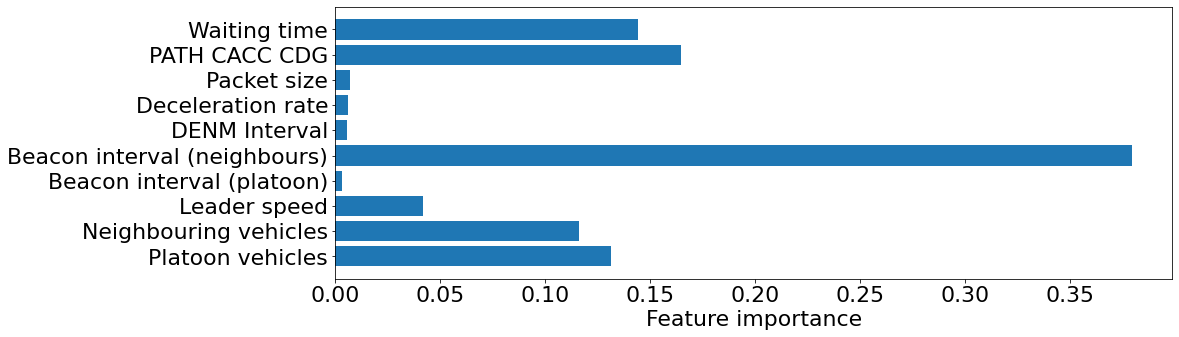

In [6]:
dt = cls.test_algorithms(X_ploeg, y_ploeg, test_dec_tree_ploeg)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names[i],v))
# plot feature importance
plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = '22'
plt.barh(f_names_plot, importance)
plt.xlabel("Feature importance", fontsize=22)
plt.show()

PLOEG plots
SPACING x 6 (waitTime + HumanCars + PlatCars + spdLeader + DENMinterval + BeaconIntervalHuman)
2 row 3 plots per row


# Decision boundaries

In [7]:
def plot_dec_boundaries(models, X_cls, y_cls, pairs, rows, columns, std, y_label, x_labels):
    plot_idx = 1
    plt.subplots(rows, columns, figsize=(25, 15))
    #no_coll = mpatches.Patch(color='lightskyblue', label='No Collision')
    #coll = mpatches.Patch(color='lightcoral', label='Collision')
    #plt.legend(handles=[no_coll,coll], loc='upper center', fontsize=32)
    for pair, x_label in zip(pairs,x_labels):
        for model in models:
            # We only take the two corresponding features
            

            # Shuffle
            X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, random_state=0)
            X_train = X_train[pair]
            if std:
                X_train = X_train[pair]
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                #X_test = scaler.transform(X_test)
                X = X_train#[:, pair]
                y = y_train
            else:
                X = X_train.to_numpy()#[:, pair]
                y = y_train.to_numpy()

            # Train
            model.fit(X, y)

            scores = model.score(X, y)
            y_pred = model.predict(X)
            scores = recall_score(y, y_pred)
            # Create a title for each column and the console by using str() and
            # slicing away useless parts of the string
            model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

            model_details = model_title
            if hasattr(model, "estimators_"):
                model_details += " with {} estimators".format(len(model.estimators_))
            print(model_details + " with features", pair, "has a score of", scores)

            plt.subplot(rows, columns, plot_idx)
            # Add a title at the top of each column
            #plt.title(pair[0], fontsize=9)
            plt.xlabel(x_label, fontsize=32)
            plt.ylabel(y_label, fontsize=32)
            # Now plot the decision boundary using a fine mesh as input to a
            # filled contour plot
            x_min, x_max = X[:, 0].min() - (X[:, 0].min() * 0.3), X[:, 0].max() + (X[:, 0].max() * 0.1)
            y_min, y_max = X[:, 1].min() - (X[:, 1].min() * 0.3), X[:, 1].max() + (X[:, 1].max() * 0.1)
            plot_step_x = (x_max - x_min) / 200
            plot_step_y = (y_max - y_min) / 200
            xx, yy = np.meshgrid(
                np.arange(x_min, x_max, plot_step_x), np.arange(y_min, y_max, plot_step_y)
            )

            # Plot either a single DecisionTreeClassifier or alpha blend the
            # decision surfaces of the ensemble of classifiers
            if isinstance(model, DecisionTreeClassifier):
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, cmap=ListedColormap(["lightskyblue", "lightcoral"]))
            else:
                # Choose alpha blend level with respect to the number
                # of estimators
                # that are in use (noting that AdaBoost can use fewer estimators
                # than its maximum if it achieves a good enough fit early on)
                estimator_alpha = 1.0 / len(model.estimators_)
                for tree in model.estimators_:
                    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                    Z = Z.reshape(xx.shape)
                    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=ListedColormap(["lightskyblue", "lightcoral"]))

            # Build a coarser grid to plot a set of ensemble classifications
            # to show how these are different to what we see in the decision
            # surfaces. These points are regularly space and do not have a
            # black outline
            '''xx_coarser, yy_coarser = np.meshgrid(
                np.arange(x_min, x_max, plot_step_coarser),
                np.arange(y_min, y_max, plot_step_coarser),
            )
            Z_points_coarser = model.predict(
                np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
            ).reshape(xx_coarser.shape)
            cs_points = plt.scatter(
                xx_coarser,
                yy_coarser,
                s=15,
                c=Z_points_coarser,
                cmap=ListedColormap(["r", "b"]),
                edgecolors="none",
            )
'''
            # Plot the training points, these are clustered together and have a
            # black outline
            plt.scatter(
                X[:, 0],
                X[:, 1],
                c=y,
                cmap=ListedColormap(["b", "r"]),
                edgecolor="k",
                s=35,
            )
            plot_idx += 1  # move on to the next plot in sequence
    #plt.suptitle(title, fontsize=12)
    #plt.axis("tight")
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
    plt.show()

In [8]:
# Parameters
n_classes = 2
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 0  # fix the seed on each iteration

DecisionTree with features ['spdLeader', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.9025974025974026
DecisionTree with features ['numPlatCars', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.9307359307359307
DecisionTree with features ['DecelerationRate', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.987012987012987


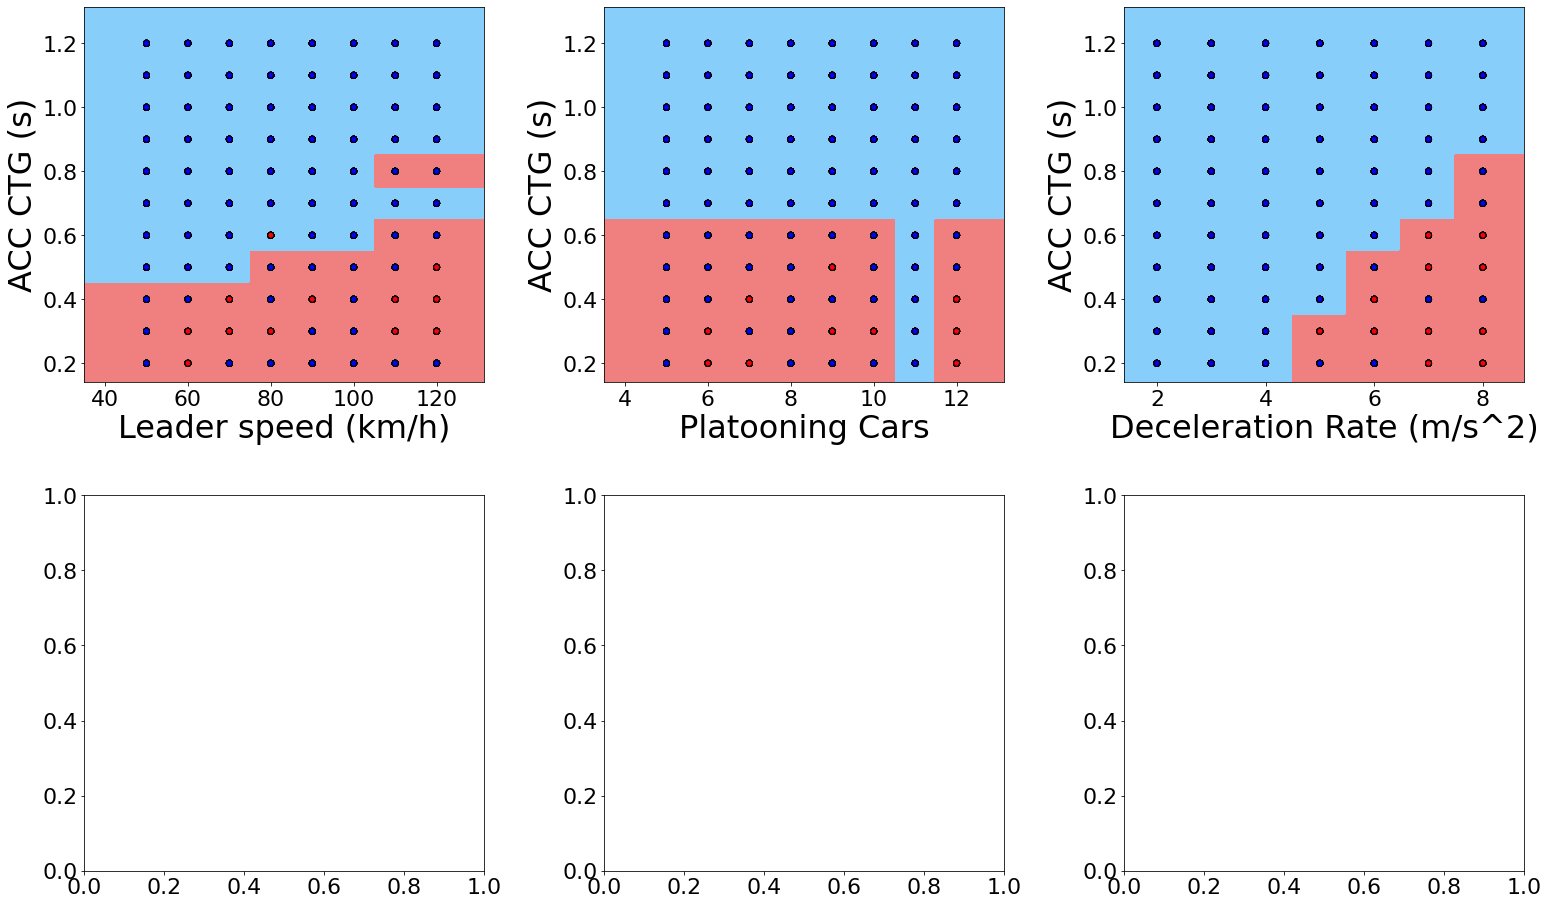

In [15]:
# Load data
models = [DecisionTreeClassifier(class_weight="balanced")]
pairs = [['spdLeader', 'Ctr_Param(Ploegh||Spacing)'],['numPlatCars', 'Ctr_Param(Ploegh||Spacing)'], ['DecelerationRate', 'Ctr_Param(Ploegh||Spacing)']]
rows = 2
columns = 3
std = False
plot_dec_boundaries(models, X_acc, y_acc, pairs, rows, columns, std, y_label = "ACC CTG (s)", x_labels = ["Leader speed (km/h)", "Platooning Cars", "Deceleration Rate (m/s^2)"])

DecisionTree with features ['waitTime', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.8547008547008547
DecisionTree with features ['numHumanCars', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.8547008547008547
DecisionTree with features ['numPlatCars', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.717948717948718
DecisionTree with features ['spdLeader', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.6239316239316239
DecisionTree with features ['DENMInterval', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.9230769230769231
DecisionTree with features ['BeaconIntervalHuman', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.8034188034188035


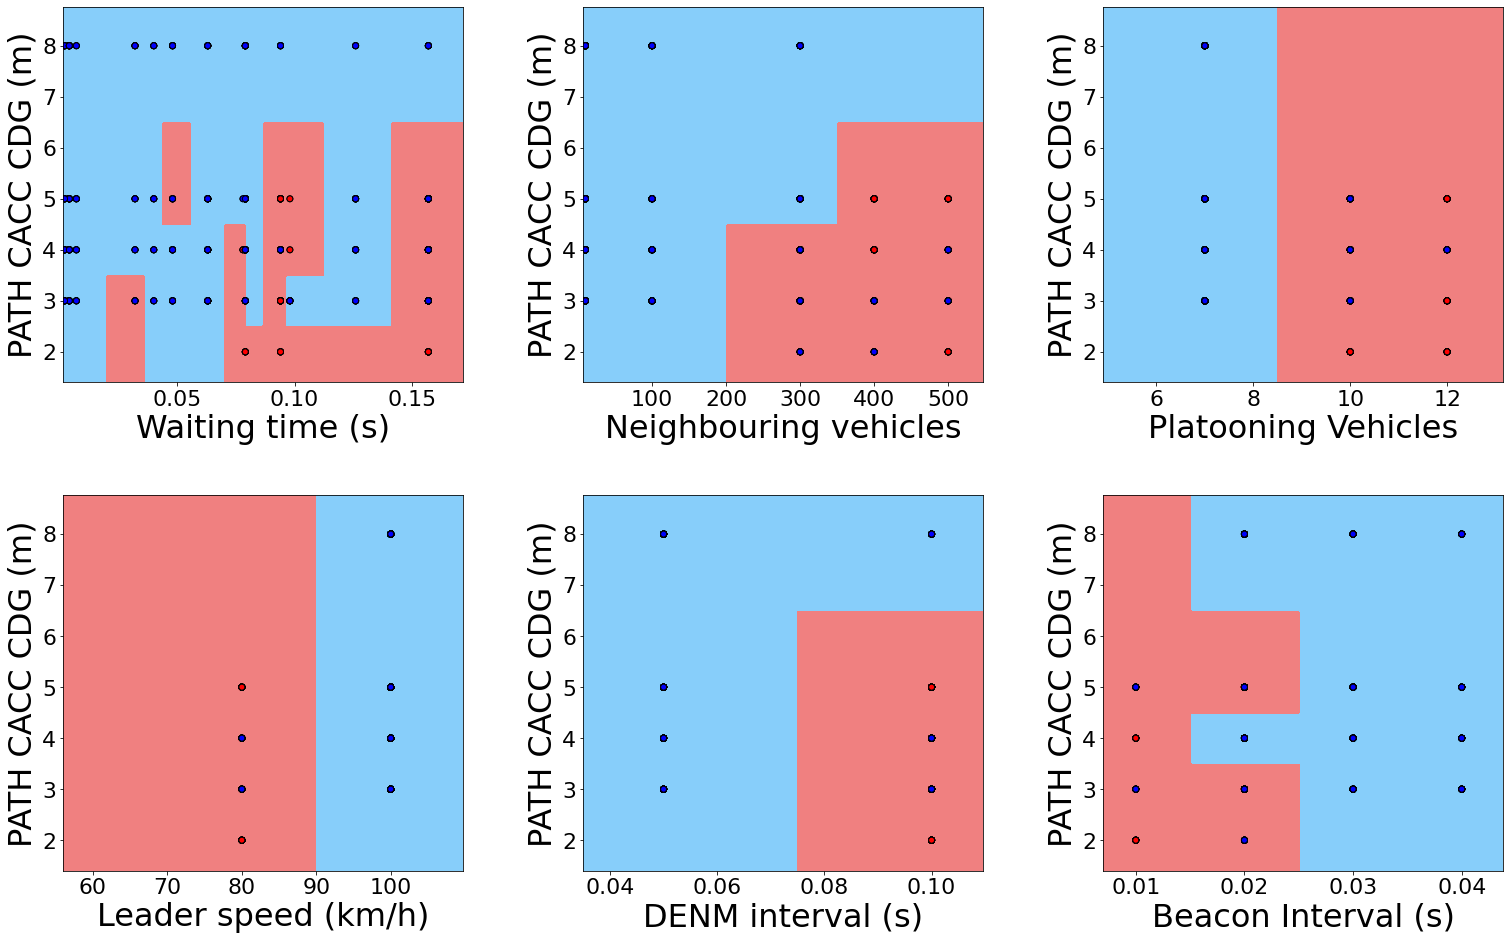

In [16]:
# Load data
#models = [RandomForestClassifier(class_weight="balanced")]
models = [DecisionTreeClassifier(class_weight="balanced")]
rows = 2
columns = 3
std = False
pairs = [['waitTime', 'Ctr_Param(Ploegh||Spacing)'],['numHumanCars', 'Ctr_Param(Ploegh||Spacing)'], ['numPlatCars', 'Ctr_Param(Ploegh||Spacing)'],
         ['spdLeader', 'Ctr_Param(Ploegh||Spacing)'],['DENMInterval', 'Ctr_Param(Ploegh||Spacing)'], ['BeaconIntervalHuman', 'Ctr_Param(Ploegh||Spacing)']]
plot_dec_boundaries(models, X_cacc, y_cacc, pairs, rows, columns, std, y_label = "PATH CACC CDG (m)", x_labels = ["Waiting time (s)", "Neighbouring vehicles", "Platooning Vehicles", "Leader speed (km/h)", "DENM interval (s)", "Beacon Interval (s)"])

DecisionTree with features ['waitTime', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.927710843373494
DecisionTree with features ['numHumanCars', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.9939759036144579
DecisionTree with features ['numPlatCars', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.9939759036144579
DecisionTree with features ['spdLeader', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.4879518072289157
DecisionTree with features ['DENMInterval', 'Ctr_Param(Ploegh||Spacing)'] has a score of 1.0
DecisionTree with features ['BeaconIntervalHuman', 'Ctr_Param(Ploegh||Spacing)'] has a score of 0.8192771084337349


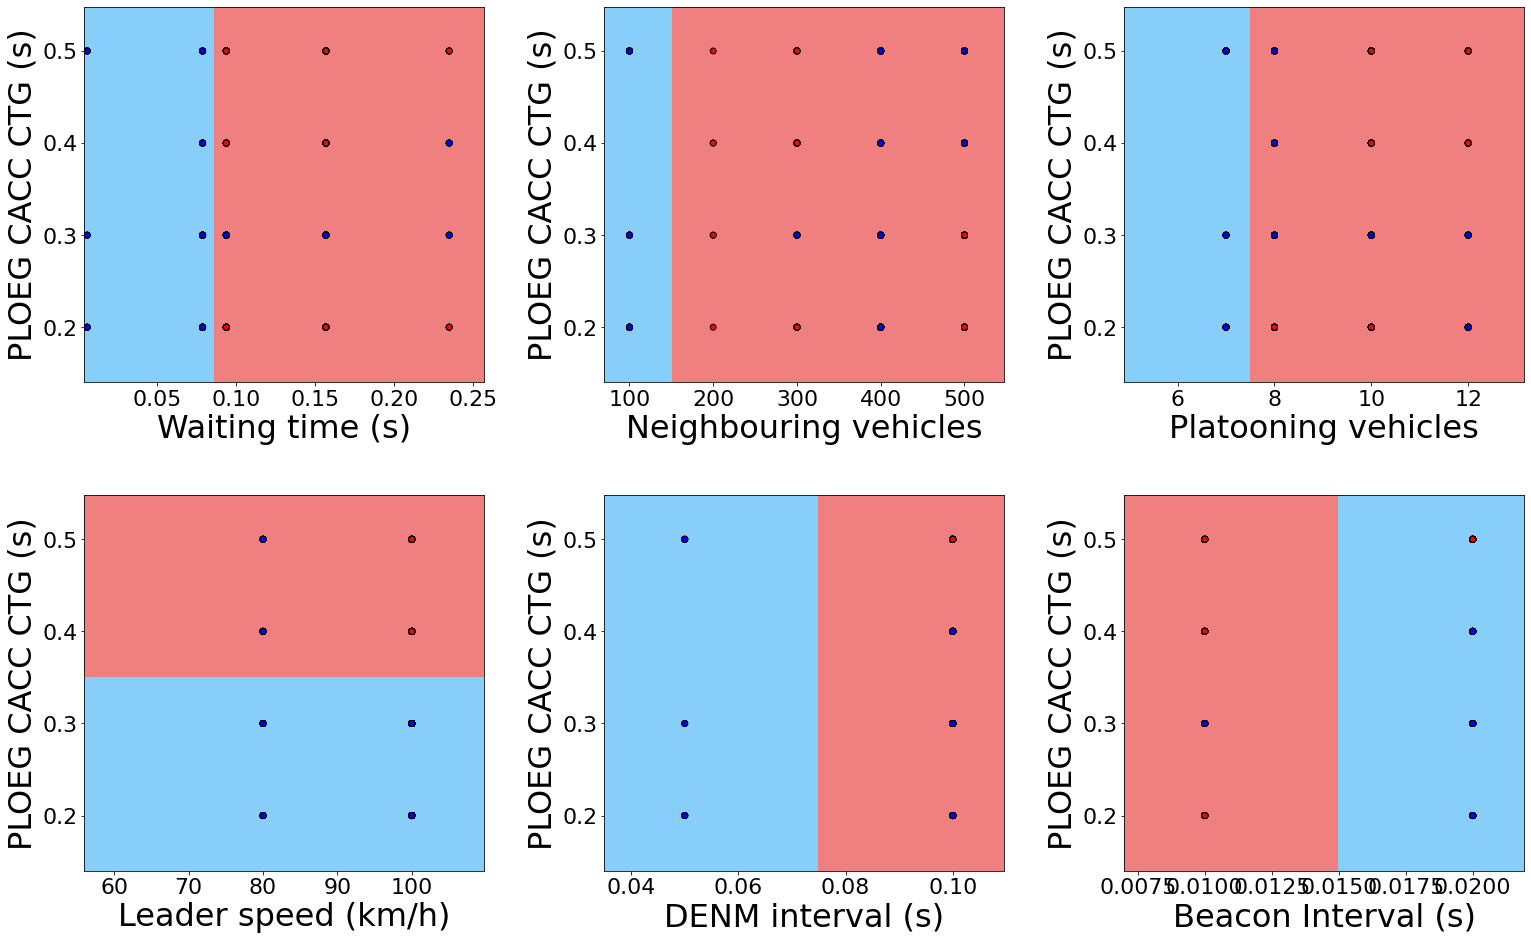

In [17]:
# Load data
#models = [RandomForestClassifier(class_weight="balanced")]
models = [DecisionTreeClassifier(class_weight="balanced")]
rows = 2
columns = 3
std = False
pairs = [['waitTime', 'Ctr_Param(Ploegh||Spacing)'],['numHumanCars', 'Ctr_Param(Ploegh||Spacing)'], ['numPlatCars', 'Ctr_Param(Ploegh||Spacing)'],
         ['spdLeader', 'Ctr_Param(Ploegh||Spacing)'],['DENMInterval', 'Ctr_Param(Ploegh||Spacing)'], ['BeaconIntervalHuman', 'Ctr_Param(Ploegh||Spacing)']]
plot_dec_boundaries(models, X_ploeg, y_ploeg, pairs, rows, columns, std, y_label = "PLOEG CACC CTG (s)", x_labels = ["Waiting time (s)", "Neighbouring vehicles", "Platooning vehicles", "Leader speed (km/h)", "DENM interval (s)", "Beacon Interval (s)"])

# RULE EXTRACTION

In [18]:
def rules_dec_tree_ploeg(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 2
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    print(cls.algor(dt, X_train, y_train, X_test, y_test, 'DecisionTree', False, column_names, [leafs]))
    return dt

def rules_dec_tree_cacc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 7#5
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    print(cls.algor(dt, X_train, y_train, X_test, y_test, 'DecisionTree', False, column_names, [leafs]))
    return dt

def rules_dec_tree_acc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 8
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    print(cls.algor(dt, X_train, y_train, X_test, y_test, 'DecisionTree', False, column_names, [leafs]))
    return dt

In [19]:
dt = cls.test_algorithms(X_acc, y_acc, rules_dec_tree_acc)
text_representation = tree.export_text(dt, feature_names=f_names_acc)
with open("../results/DT_ACC_truncated_limit.log", "w") as fout:
    fout.write(text_representation)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassif

      Algorithm  Standarised  AccTrain       Acc      Prec    Recall   TN  \
0  DecisionTree        False  0.885953  0.873228  0.486395  0.993056  904   

    FP  FN   TP   TimeMed   TimeMax   TimeMin  max_leaf_node  
0  151   1  143  0.000445  0.013315  0.000118              8  


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassif

In [20]:
dt = cls.test_algorithms(X_cacc, y_cacc, rules_dec_tree_cacc)
text_representation = tree.export_text(dt, feature_names=f_names)
with open("../results/DT_CACC_truncated_limit.log", "w") as fout:
    fout.write(text_representation)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassif

      Algorithm  Standarised  AccTrain      Acc     Prec    Recall   TN  FP  \
0  DecisionTree        False  0.797468  0.78903  0.47191  0.933333  145  47   

   FN  TP   TimeMed   TimeMax   TimeMin  max_leaf_node  
0   3  42  0.000495  0.005384  0.000129              7  


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassif

In [21]:
dt = cls.test_algorithms(X_ploeg, y_ploeg, rules_dec_tree_ploeg)
text_representation = tree.export_text(dt, feature_names=f_names)
with open("../results/DT_PLOEG_truncated.log", "w") as fout:
    fout.write(text_representation)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassif

      Algorithm  Standarised  AccTrain       Acc      Prec    Recall  TN  FP  \
0  DecisionTree        False  0.851744  0.869565  0.913043  0.792453  58   4   

   FN  TP   TimeMed   TimeMax   TimeMin  max_leaf_node  
0  11  42  0.000329  0.009804  0.000103              2  


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassif